In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('../datasets/d5.csv')
df.columns


Index(['Date', 'Energy Consumption'], dtype='object')

In [4]:
df

,Date,Energy Consumption
0,2020-01-01,305.311409
1,2020-01-02,299.374329
2,2020-01-03,307.646359
3,2020-01-04,316.811967
4,2020-01-05,299.651923
...,...,...
1455,2023-12-26,380.398916
1456,2023-12-27,405.951747
1457,2023-12-28,402.642110
1458,2023-12-29,412.140555


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,Energy Consumption
0,2020-01-01,305.311409
1,2020-01-02,299.374329
2,2020-01-03,307.646359
3,2020-01-04,316.811967
4,2020-01-05,299.651923
...,...,...
1455,2023-12-26,380.398916
1456,2023-12-27,405.951747
1457,2023-12-28,402.642110
1458,2023-12-29,412.140555


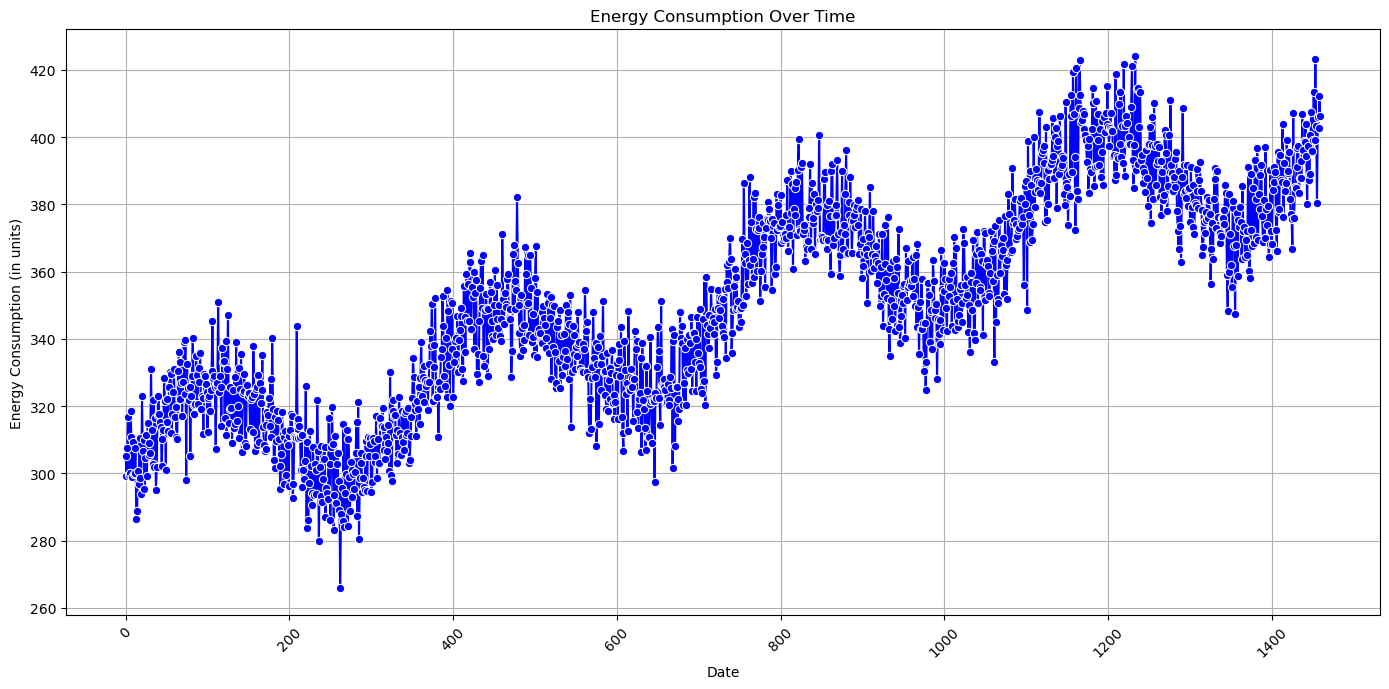

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the energy consumption
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Energy Consumption', marker='o', color='b')

# Adding titles and labels
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (in units)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()


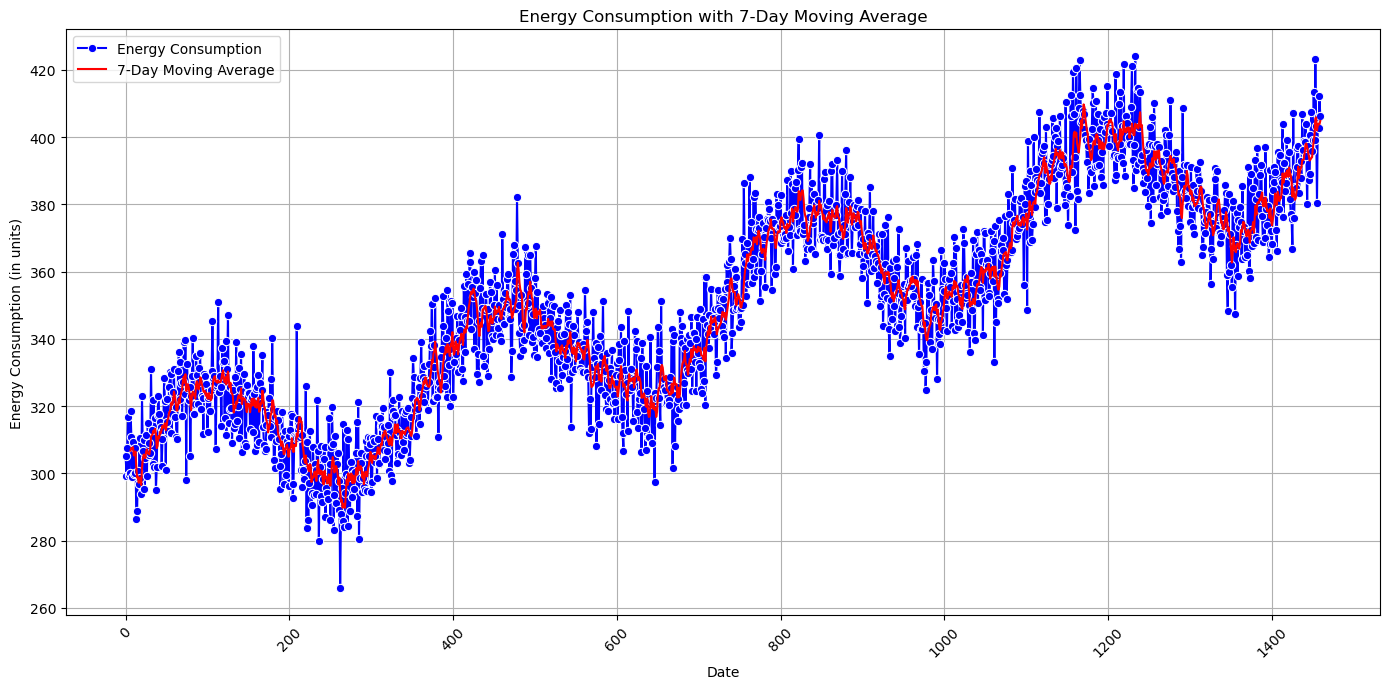

In [8]:
# Calculate a 7-day moving average
df['7-Day MA'] = df['Energy Consumption'].rolling(window=7).mean()

# Plot the original data with the moving average
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Energy Consumption', marker='o', color='b', label='Energy Consumption')
sns.lineplot(data=df, x=df.index, y='7-Day MA', color='r', label='7-Day Moving Average')

# Adding titles and labels
plt.title('Energy Consumption with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (in units)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


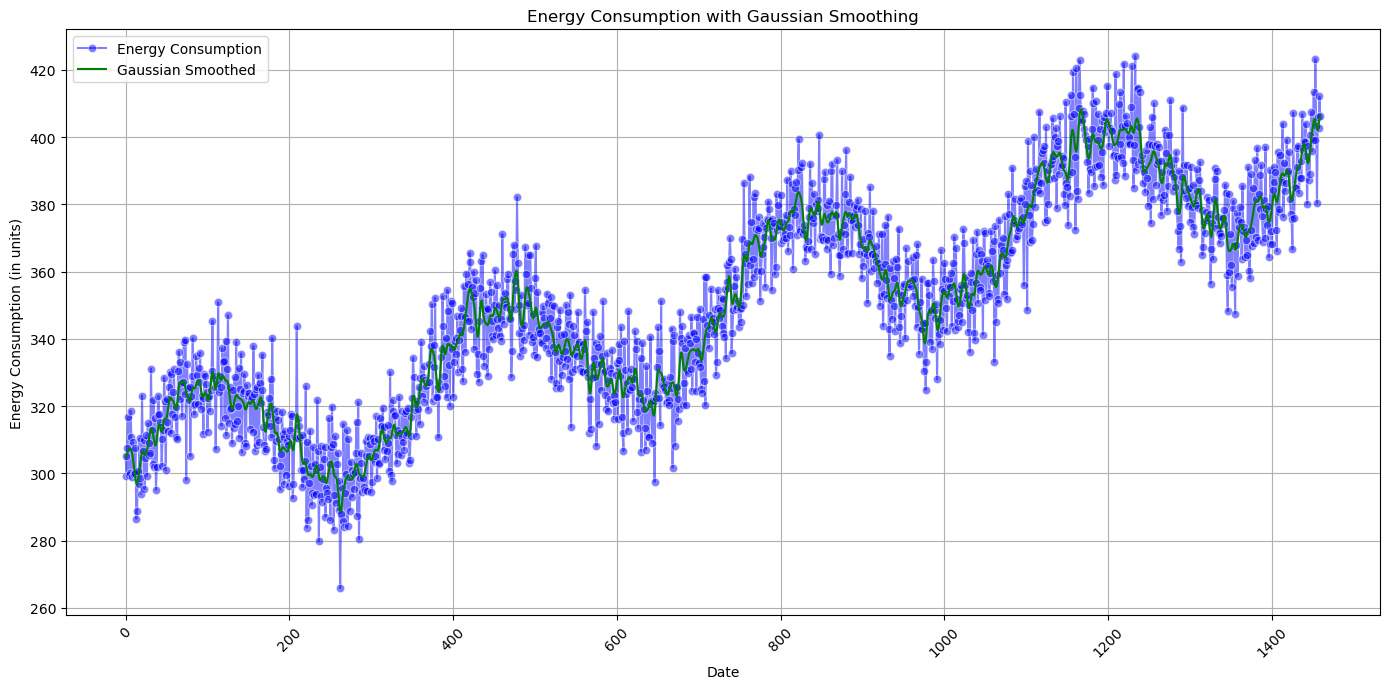

In [9]:
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian filter for smoothing
sigma = 2  # Adjust sigma for more or less smoothing
df['Gaussian Smoothed'] = gaussian_filter1d(df['Energy Consumption'], sigma=sigma)

# Plot the original data and the smoothed data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Energy Consumption', marker='o', color='b', label='Energy Consumption', alpha=0.5)
sns.lineplot(data=df, x=df.index, y='Gaussian Smoothed', color='g', label='Gaussian Smoothed')

# Adding titles and labels
plt.title('Energy Consumption with Gaussian Smoothing')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (in units)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


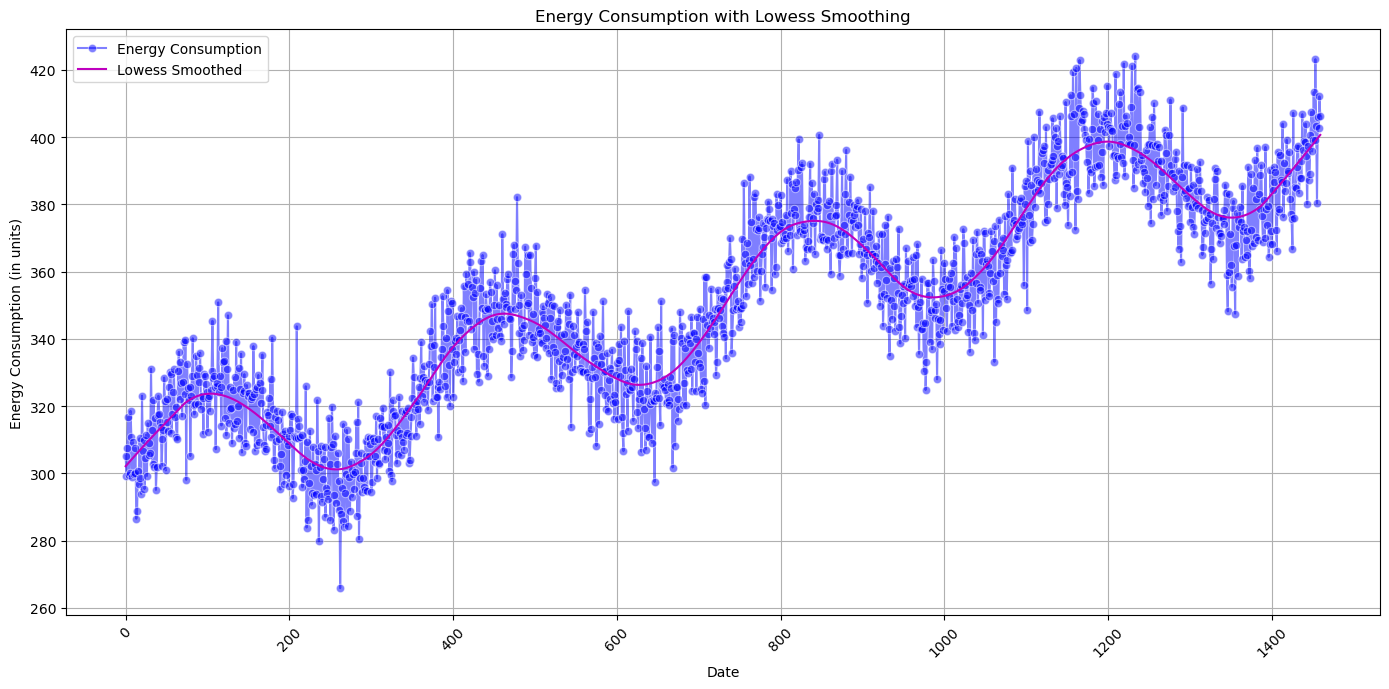

In [10]:
from statsmodels.nonparametric.smoothers_lowess import lowess

# Apply Lowess smoothing
lowess_result = lowess(df['Energy Consumption'], df.index, frac=0.1)  # Adjust frac for smoothing level
df['Lowess Smoothed'] = lowess_result[:, 1]

# Plot the original data and the lowess smoothed data
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x=df.index, y='Energy Consumption', marker='o', color='b', label='Energy Consumption', alpha=0.5)
sns.lineplot(data=df, x=df.index, y='Lowess Smoothed', color='m', label='Lowess Smoothed')

# Adding titles and labels
plt.title('Energy Consumption with Lowess Smoothing')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (in units)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
df.set_index('Date', inplace=True)
# Calculer la consommation moyenne par mois
monthly_avg_consumption = df.resample('ME').mean()  # 'M' pour mensuel
monthly_avg_consumption['Month'] = monthly_avg_consumption.index.month
monthly_avg_consumption['Year'] = monthly_avg_consumption.index.year

# Optionnel : grouper par année et mois
monthly_avg_consumption_grouped = monthly_avg_consumption.groupby(['Year', 'Month']).mean().reset_index()


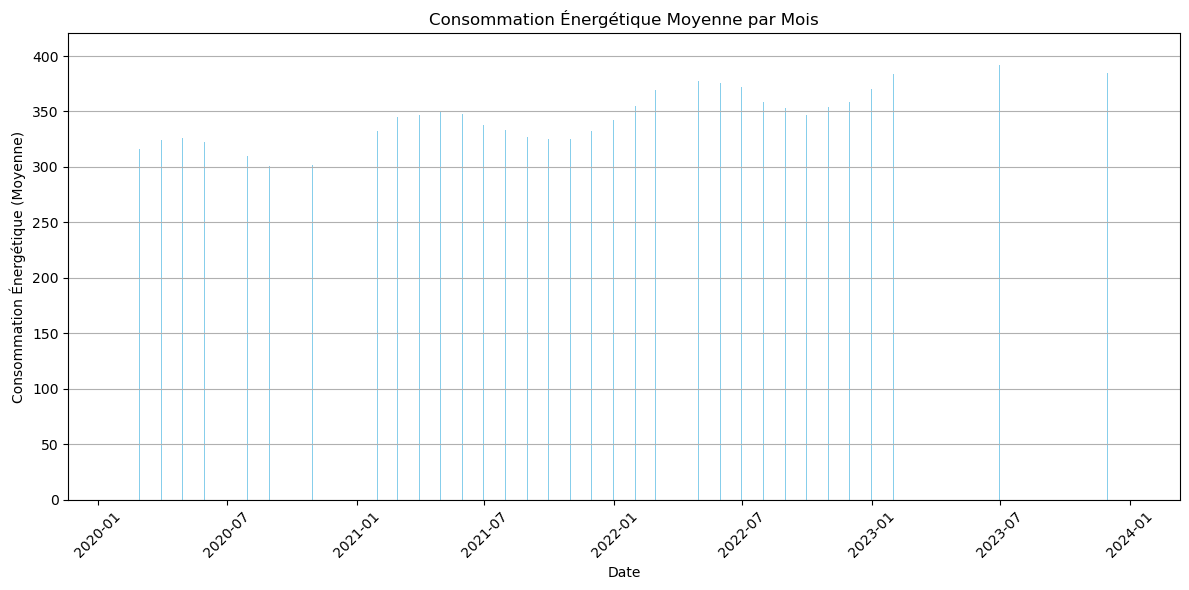

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_consumption.index, monthly_avg_consumption['Energy Consumption'], color='skyblue')
plt.title('Consommation Énergétique Moyenne par Mois')
plt.xlabel('Date')
plt.ylabel('Consommation Énergétique (Moyenne)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better fit
plt.show()


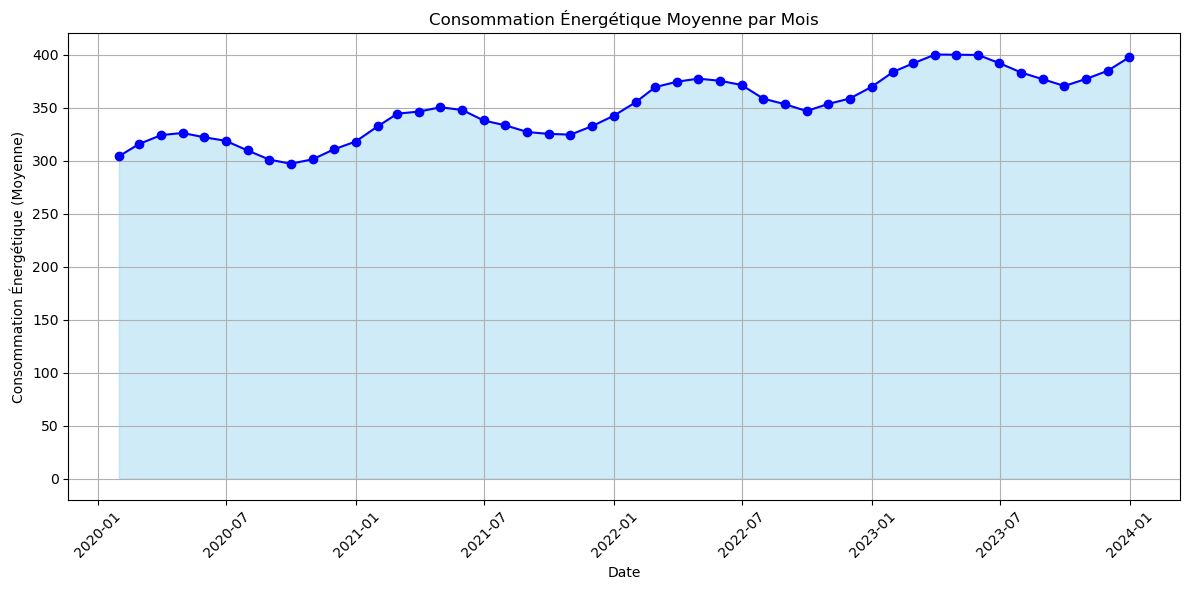

In [13]:
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_avg_consumption.index, monthly_avg_consumption['Energy Consumption'], color='skyblue', alpha=0.4)
plt.plot(monthly_avg_consumption.index, monthly_avg_consumption['Energy Consumption'], color='blue', marker='o')
plt.title('Consommation Énergétique Moyenne par Mois')
plt.xlabel('Date')
plt.ylabel('Consommation Énergétique (Moyenne)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
